b'Generating dummy datadone..\nx,y,t,p,vx_perp,vy_perp\ndone..\nWork took 0.007726 seconds for 1 K events (num_thread: 64)\nSaving datadone..'
0
(208, 272, 2)


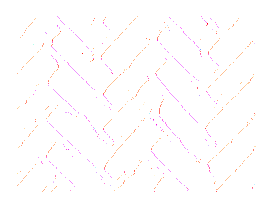

In [26]:
import numpy as np
import flow_vis
import command 
from IPython.display import Image, display

fpath = 'result/flo.bin'
W, H, C = 272,208, 2
run_cpp= True

if run_cpp:
    res = command.run(['./process', '64']) 
    print(res.output) 
    print(res.exit)

a = np.fromfile(fpath, dtype=np.float64) 
a = a.reshape([H,W,C])
print(a.shape)

flow_vis.save_flo(a, 'result/flo.png')
display(Image(filename='result/flo.png')) 